In [41]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


def show(path, sz=(8, 8)):
    img = mpimg.imread(path)
    plt.figure(figsize=sz)
    plt.axis("off")
    plt.imshow(img)

# PCA (Principal Component Analysis)
- As the name suggests it gives us the principal components from the unsupervised data
- Principal is the measure of the variance of the features
- Fundamental dimension reduction technique
- First step 'decorrelation'
- Second step 'reduces dimension'

# PCA aligns data with axis
- Rotates data samples to be aligned with axes
- Shifts data samples so they have mean zero
- No information is lost

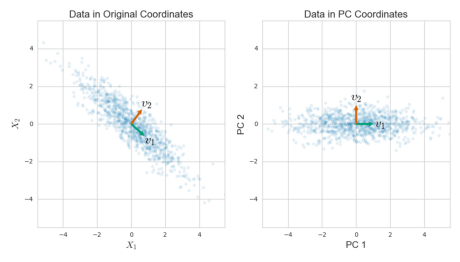

In [8]:
show(r"images/pca_step_one.png")

- Array grains have the width and length of samples of grain. 
- We suspect that width and length will be correlated. 
- To confirm this, let's make a scatter plot of width vs length and measure their Pearson correlation.

In [15]:
df = pd.read_csv(r"datasets/seeds-width-vs-length.csv", header=None)
grains = df.values

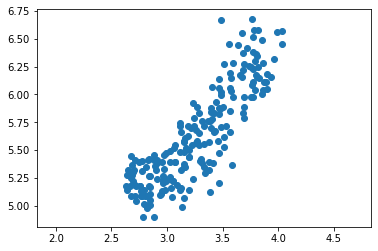

0.8604149377143469


In [16]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis("equal")
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

# Decorrelating the grain measurements with PCA

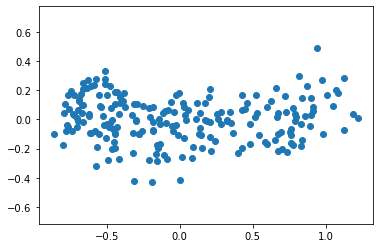

1.1676857397668883e-16
Now correlation is zero and data is shifted along axis


In [18]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis("equal")
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)
print("Now correlation is zero and data is shifted along axis")

# Intrinsic Dimension
- Intrinsic dimension = number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA
- **Intrinsic dimension = number of PCA features with significant variance**

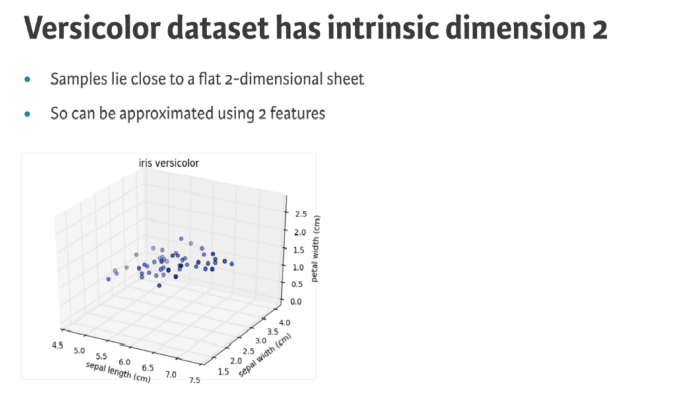

In [23]:
show(r"images/intrinsic_2dimension.png", (12, 12))

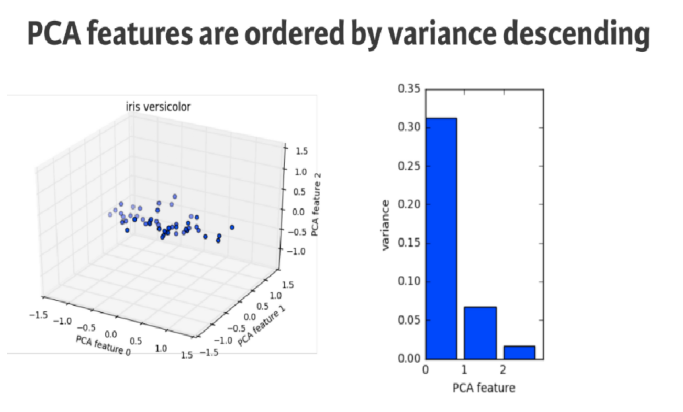

In [28]:
show(r"images/pca_features.png", (12, 12))

**The first principal component** of the data is the direction in which the data varies the most.
We use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

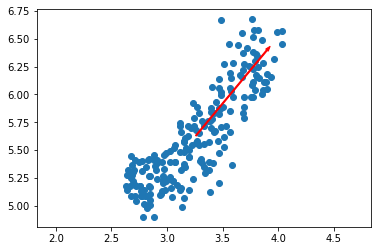

In [30]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:, 0], grains[:, 1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color="red", width=0.01)

# Keep axes on same scale
plt.axis("equal")
plt.show()

In [33]:
fish=pd.read_csv(r'datasets/fish.csv',header=None)
samples=fish.values[:,1:]

6
[4. 2. 0. 0. 0. 0.]


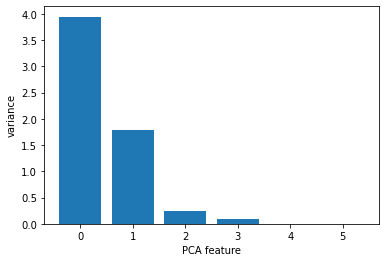

Therefore two is a reasonable choice for the "intrinsic dimension" of the fish measurements


In [51]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
print(pca.n_components_)
print(np.round(pca.explained_variance_))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel("PCA feature")
plt.ylabel("variance")
plt.xticks(features)
plt.show()
print('Therefore two is a reasonable choice for the "intrinsic dimension" of the fish measurements')

In [55]:
# Import PCA
from sklearn.decomposition import PCA

scaled_samples = scaler.fit_transform(samples)
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)
print('Reduced the dimensionality from 6 to 2!')

(85, 2)
Reduced the dimensionality from 6 to 2!


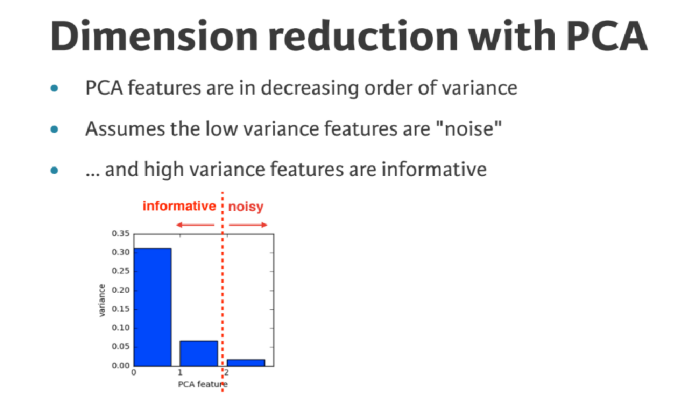

In [45]:
show(r'images/dimension_reduction_with_pca.png',(12,12))

# Word frequency Arrays
- Rows represent documents, columns represent words
- Entries measure presence of each word in each document
- Measured using "tf-idf"

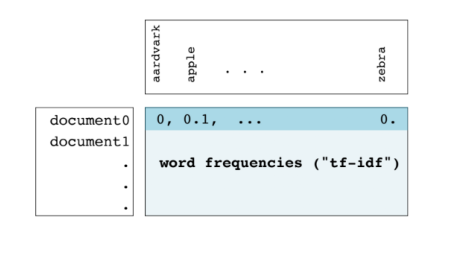

In [49]:
show(r'images/word_frequency.png')

# Sparse arrays and csr_matrix

- Array is **sparse**: most entries are zero
- Can use **scipy.sparse.csr_matrix** instead of NumPy array
- csr_matrix **remembers only the non-zero entries** (saves space!)
- In tf-idf :
    - "tf" = frequency of word in documents
    - "idf" = reduces influence of frequent words

In [57]:
# Creating tf-idf word frequency array
documents = ["cats say meow", "dogs say woof", "dogs chase cats"]
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']
